# EJERCICIO 1
Una población compuesta por 10 000 integrantes en el momento inicial se encuentra sujeta a una única causa de salida: fallecimiento. La tasa de fallecimiento (𝜇(𝑡)) se comporta como una variable aleatoria, bajo una distribución binomial (∼ 𝐵𝑖𝑛(𝑛 = 𝑁(𝑡 − 1); 𝑝 = 𝜇)). El valor del parámetro 𝜇 equivale a 0.0045.
## Se pide:
1. Calcular el valor esperado de la población en 𝑇 = 5 y su dispersión.
2. Graficar la trayectoria del valor medio de la población. Graficar su dispersión.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las variables necesarias para resolver el ejercicio 1.
N = 10000
mu_ej1= 0.0045
T_ej1 = 5

In [2]:
def simular_poblacion_en_1_año_ej1(N, mu, rng):
    # Esta función calcula la población a partir de N.

    return N - rng.binomial(N, mu)

In [8]:
def simular_poblacion_en_t_años_ej1(N, T, mu, rng):
    T = T + 1 # Para que el rango de tiempo vaya de 0 a T.
    poblacion = []
    poblacion.append(N)

    # En cada instante de tiempo, la población se actualiza en base a la cantidad de fallecimientos
    for t in range(1, T):
        poblacion.append(simular_poblacion_en_1_año_ej1(poblacion[-1], mu, rng))

    return poblacion

In [9]:
# Lo probamos
poblacion_en_t_años_ej1 = simular_poblacion_en_t_años_ej1(N, T_ej1, mu_ej1, np.random.default_rng(171123))
print(poblacion_en_t_años_ej1)

[10000, 9954, 9911, 9869, 9830, 9774]


In [10]:
def calcular_dispersion_ej1(poblacion):
    dispersiones = []
    for i in range(0, len(poblacion)):
        dispersiones.append(np.std(poblacion[:i+1]))
    return dispersiones

dispersiones_ej1 = calcular_dispersion_ej1(poblacion_en_t_años_ej1)

El valor esperado de la población en T = 5 es 9774.
La dispersión de la población en T = 5 es 75.42472332656507.
Valor esperado de la población en cada período: [10000, 9954, 9911, 9869, 9830, 9774]
Dispersión de la población en cada período: [0.0, 23.0, 36.34097778908359, 48.75705077217038, 60.13118991006248, 75.42472332656507].


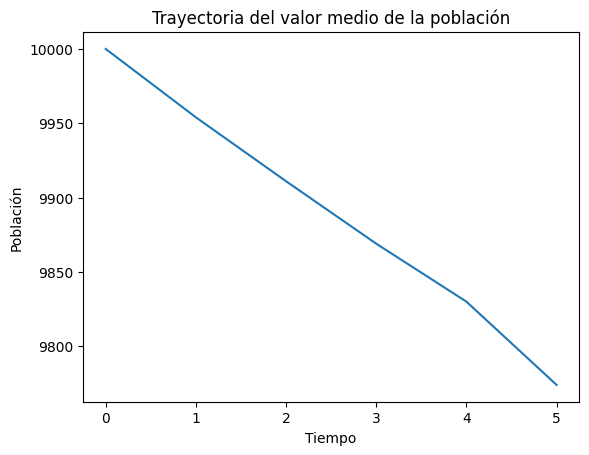

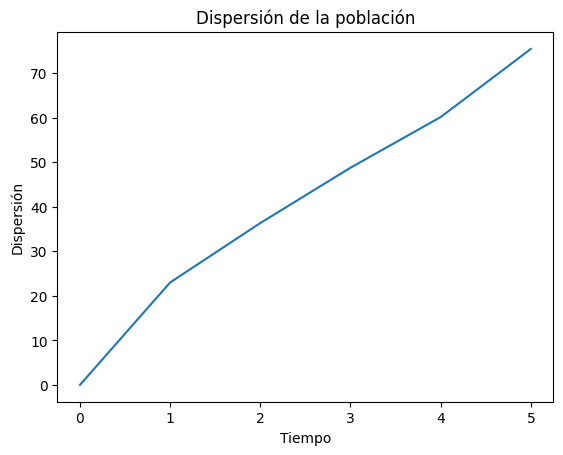

In [11]:
print(f'El valor esperado de la población en T = {T_ej1} es {poblacion_en_t_años_ej1[-1]}.')
print(f'La dispersión de la población en T = {T_ej1} es {dispersiones_ej1[-1]}.')

print(f'Valor esperado de la población en cada período: {poblacion_en_t_años_ej1}')
print(f'Dispersión de la población en cada período: {dispersiones_ej1}.')


# Hasta acá podemos ver el valor esperado de la población en T = 5, y su dispersión, es decir, como
# varía la población hasta el momento 5.

# Gráficamente:
plt.plot(poblacion_en_t_años_ej1)
plt.title('Trayectoria del valor medio de la población')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.show()

print("\n")

plt.plot(dispersiones_ej1)
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.title('Dispersión de la población')
plt.show()

# Todo esto es al realizar una sola simulación. Lo interesante es ver estos resultados al hacer más
# simulaciones, para obtener valores más precisos.

In [12]:
# Acá simulamos todo lo anterior de la siguiente manera:
# Cómo mínimo habrán 30 simulaciones, y a partir de eso seguimos simulando mientras el desvío de la
# población sea mayor al deseado.

num_simulaciones_minimas_ej1 = 30
d_ej1 = 0.1
desvio_actual_ej1 = 0

contador_simulaciones_ej1 = 0
res_ej1 = []
while (contador_simulaciones_ej1 < num_simulaciones_minimas_ej1 or (contador_simulaciones_ej1 >= num_simulaciones_minimas_ej1 and desvio_actual_ej1 > d_ej1)):
    # Definimos una semilla que va aumentando según la cantidad de iteraciones. Esto lo hacemos
    # para que los vectores sean distintos entre sí, pero que cada vez que ejecutemos el código,
    # se van a generar estos mismos vectores.
    rng = np.random.default_rng(191123+contador_simulaciones_ej1)

    res_ej1.append(simular_poblacion_en_t_años_ej1(N, T_ej1, mu_ej1, rng))

    contador_simulaciones_ej1 += 1
    desvio_actual_ej1 = np.std(res_ej1) / contador_simulaciones_ej1

In [13]:
print(f'Se hicieron {contador_simulaciones_ej1} simulaciones')

Se hicieron 769 simulaciones


In [14]:
# Ahora en la variables res tenemos una lista que adentro tiene todas las simulaciones realizadas.
# Como ejemplo, mostramos las primeras y las últimas 2 simulaciones:
print(res_ej1[0], res_ej1[1], res_ej1[-2], res_ej1[-1])

[10000, 9957, 9901, 9860, 9816, 9780] [10000, 9950, 9908, 9859, 9821, 9773] [10000, 9958, 9906, 9861, 9819, 9776] [10000, 9955, 9907, 9861, 9818, 9777]


In [16]:
# Vamos a calcular la media del valor esperado en T=5
poblacion_en_5_ej1 = [sublista[-1] for sublista in res_ej1]

# En poblacion_en_5 tenemos la cantidad de población que hay en el momento 5 en cada simulación.
# Obtenemos su media:

media_poblacion_en_5_ej1 = np.round(np.mean(poblacion_en_5_ej1))

print(f'La media de población en T={T_ej1} de todas las simulaciones es {media_poblacion_en_5_ej1}')

La media de población en T=5 de todas las simulaciones es 9777.0


In [17]:
# En cuanto a la dispersión, vamos a analizar dos casos:
# 1. Como varía la población en T=5 en promedio entre todas las simulaciones.

# Obtenemos todas las dispersiones para cada simulación:
dispersiones_simuladas_ej1 = []
for simulacion in res_ej1:
    dispersiones_simuladas_ej1.append(calcular_dispersion_ej1(simulacion))

dispersiones_en_5_ej1 = [sublista[-1] for sublista in dispersiones_simuladas_ej1]
dispersion_poblacion_en_5_ej1 = np.mean(dispersiones_en_5_ej1)

print(f'La media de dispersiones en T=5 de todas las simulaciones es {dispersion_poblacion_en_5_ej1}')

# 2. Como varía la dispersión entre cada simulación en T=5.
print(f'La dispersión entre simulaciones en T=5 es {np.std(poblacion_en_5_ej1)}')

La media de dispersiones en T=5 de todas las simulaciones es 76.31106653794163
La dispersión entre simulaciones en T=5 es 14.282326675809083


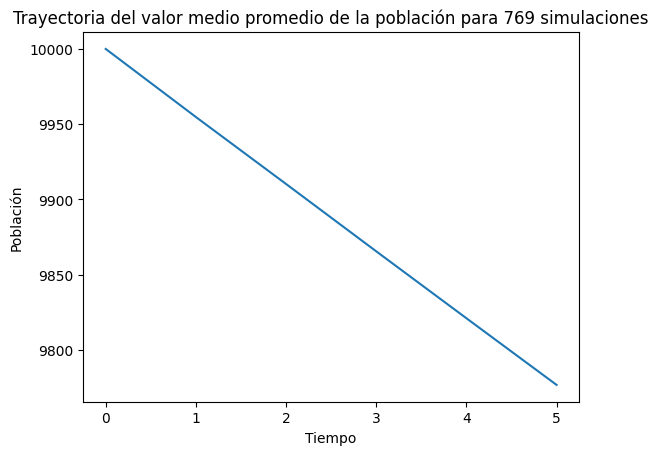

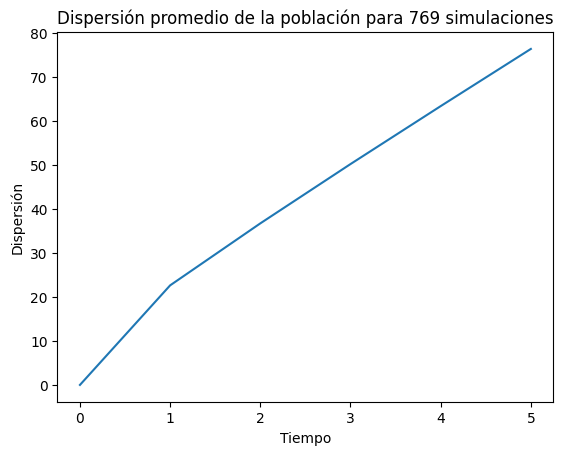

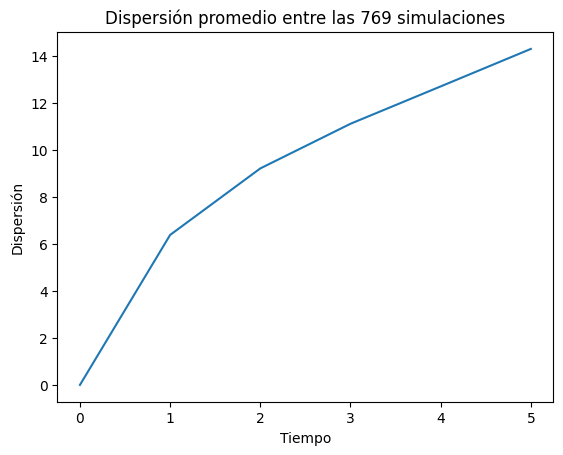

In [20]:
# Obtenemos la media para cada momento:
medias_ej1 = []
[medias_ej1.append(np.mean([sublista[i] for sublista in res_ej1])) for i in range(0, T_ej1 + 1)]

# Graficamos la trayectoria del valor medio de la población
plt.plot(medias_ej1)
plt.title(f'Trayectoria del valor medio promedio de la población para {contador_simulaciones_ej1} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.show()

print("\n")

# Obtenemos la dispersion para cada momento
dispersiones_medias_ej1 = []
[dispersiones_medias_ej1.append(np.mean([sublista[i] for sublista in dispersiones_simuladas_ej1])) for i in range(0, T_ej1 + 1)]

# Graficamos
plt.plot(dispersiones_medias_ej1)
plt.title(f'Dispersión promedio de la población para {contador_simulaciones_ej1} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.show()

print("\n")


# Obtenemos la dispersión entre cada simulación para cada momento
dispersiones_entre_simulaciones_ej1 = []
[dispersiones_entre_simulaciones_ej1.append(np.std([sublista[i] for sublista in res_ej1])) for i in range(0, T_ej1 + 1)]

# Graficamos
plt.plot(dispersiones_entre_simulaciones_ej1)
plt.title(f'Dispersión promedio entre las {contador_simulaciones_ej1} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.show()

# Ejercicio 2
Una población compuesta por 10 000 integrantes en el momento inicial se encuentra sujeta a dos causas de salida: migración y fallecimiento.
*   Migración: las migraciones ocurren bajo una distribución de Poisson. El parámetro 𝜆 debe ser calculado de la siguiente manera: 𝑁(𝑡 − 1) ∗ 𝜃, donde 𝑁(𝑡 − 1) representa el
tamaño de la población en el período anterior y 𝜃 es la tasa de migración. El valor de
𝜃 es 0.025.
*   Fallecimiento: los fallecimientos se comportan bajo la misma lógica que el ejercicio
anterior (Ejercicio 1).

Aquellas personas que no fueron afectadas por la migración se
encuentra afectadas por la segunda causa de decremento. El valor de 𝜇 es 0.0065.
### Se pide:
1. Calcular el valor esperado de la población en 𝑇 = 5 y su dispersión.
2. Graficar la trayectoria del valor medio de la población. Graficar su dispersión.
3. Compare los resultados de los Ejercicios 1 y 2. Grafique.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las variables necesarias para resolver el ejercicio 1.
N = 10000
# Datos migración
tita_ej2 = 0.025
# Datos fallecimiento
mu_ej2 = 0.0065


T_ej2 = 5

In [22]:
def simular_poblacion_en_1_año_ej2(N, migraciones, mu, rng):
    # Esta función calcula la población a partir de N.

    return N - migraciones - rng.binomial(N - migraciones, mu)

In [23]:
def simular_poblacion_en_t_años_ej2(N, T, tita, mu, rng):
    T = T + 1 # Para que el rango de tiempo vaya de 0 a T.
    poblacion = []
    poblacion.append(N)

    # En cada instante de tiempo, la población se actualiza en base a la cantidad de fallecimientos
    # y migraciones
    for t in range(1, T):
        lambda_1 = poblacion[t-1] * tita
        migraciones = rng.poisson(lambda_1)
        poblacion.append(simular_poblacion_en_1_año_ej2(poblacion[-1], migraciones, mu, rng))

    return poblacion

In [24]:
# Lo probamos
poblacion_en_t_años_ej2 = simular_poblacion_en_t_años_ej2(N, T_ej2, tita_ej2, mu_ej2, np.random.default_rng(171123))
print(poblacion_en_t_años_ej2)

[10000, 9696, 9408, 9094, 8824, 8553]


In [25]:
def calcular_dispersion_ej2(poblacion):
    dispersiones = []
    for i in range(0, len(poblacion)):
        dispersiones.append(np.std(poblacion[:i+1]))
    return dispersiones

dispersiones_ej2 = calcular_dispersion_ej2(poblacion_en_t_años_ej2)

El valor esperado de la población en T = 5 es 8553.
La dispersión de la población en T = 5 es 496.16252377623204.
Valor esperado de la población en cada período: [10000, 9696, 9408, 9094, 8824, 8553]
Dispersión de la población en cada período: [0.0, 152.0, 241.71240946399277, 336.1231173245899, 417.85049958089076, 496.16252377623204].


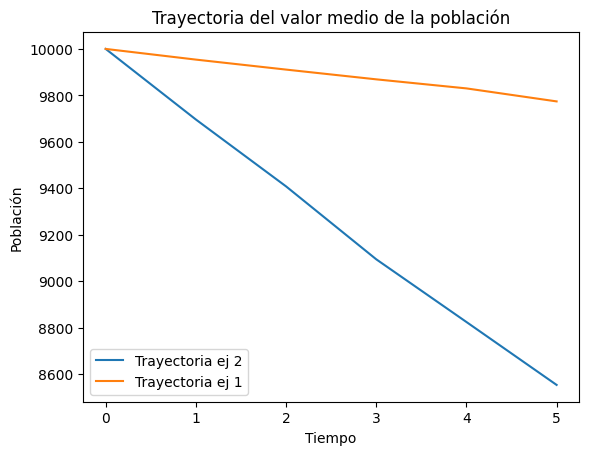

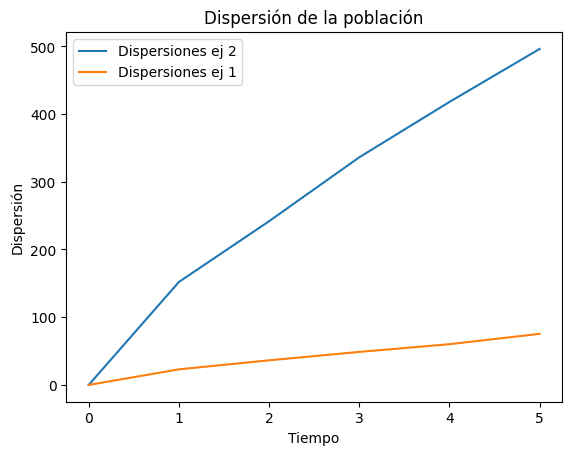

In [26]:
print(f'El valor esperado de la población en T = {T_ej2} es {poblacion_en_t_años_ej2[-1]}.')
print(f'La dispersión de la población en T = {T_ej2} es {dispersiones_ej2[-1]}.')

print(f'Valor esperado de la población en cada período: {poblacion_en_t_años_ej2}')
print(f'Dispersión de la población en cada período: {dispersiones_ej2}.')


# Hasta acá podemos ver el valor esperado de la población en T = 5, y su dispersión, es decir, como
# varía la población hasta el momento 5.

# Gráficamente:
plt.plot(poblacion_en_t_años_ej2, label='Trayectoria ej 2')
plt.plot(poblacion_en_t_años_ej1, label='Trayectoria ej 1')
plt.title('Trayectoria del valor medio de la población')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.show()

print("\n")

plt.plot(dispersiones_ej2, label='Dispersiones ej 2')
plt.plot(dispersiones_ej1, label='Dispersiones ej 1')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.title('Dispersión de la población')
plt.legend()
plt.show()

# Todo esto es al realizar una sola simulación. Lo interesante es ver estos resultados al hacer más
# simulaciones, para obtener valores más precisos.

In [28]:
# Comparemos los resultados numéricamente de los 2 ejercicios:
print(f'La diferencia de población entre los ejs para cada período es: {list(np.abs(np.array(poblacion_en_t_años_ej2) - np.array(poblacion_en_t_años_ej1)))}')
print(f'La diferencia de dispersión entre los ejs para cada período es: {list(np.abs(np.array(dispersiones_ej2) - np.array(dispersiones_ej1)))}')

# Observamos que la población en el ejercicio 2 disminuye más rapido debido a que existe el evento
# de la migración, además del de fallecimiento. Por esta misma razón la dispersión es mayor.

La diferencia de población entre los ejs para cada período es: [0, 258, 503, 775, 1006, 1221]
La diferencia de dispersión entre los ejs para cada período es: [0.0, 129.0, 205.3714316749092, 287.3660665524195, 357.7193096708283, 420.73780044966696]


In [33]:
# Acá simulamos todo lo anterior de la siguiente manera:
# Cómo mínimo habrán 30 simulaciones, y a partir de eso seguimos simulando mientras el desvío de la
# población sea mayor al deseado.

num_simulaciones_minimas_ej2 = 30
d_ej2 = 0.3
desvio_actual_ej2 = 0

contador_simulaciones_ej2 = 0
res_ej2 = []
while (contador_simulaciones_ej2 < num_simulaciones_minimas_ej2 or (contador_simulaciones_ej2 >= num_simulaciones_minimas_ej2 and desvio_actual_ej2 > d_ej2)):
    # Definimos una semilla que va aumentando según la cantidad de iteraciones. Esto lo hacemos
    # para que los vectores sean distintos entre sí, pero que cada vez que ejecutemos el código,
    # se van a generar estos mismos vectores.
    rng = np.random.default_rng(191123+contador_simulaciones_ej2)

    res_ej2.append(simular_poblacion_en_t_años_ej2(N, T_ej2, tita_ej2, mu_ej2, rng))

    contador_simulaciones_ej2 += 1
    desvio_actual_ej2 = np.std(res_ej2) / contador_simulaciones_ej2

In [30]:
print(f'Se hicieron {contador_simulaciones_ej2} simulaciones')

Se hicieron 1677 simulaciones


In [34]:
# Ahora en la variables res tenemos una lista que adentro tiene todas las simulaciones realizadas.
# Como ejemplo, mostramos las primeras y las últimas 2 simulaciones:
print(res_ej2[0], res_ej2[1], res_ej2[-2], res_ej2[-1])

[10000, 9681, 9363, 9083, 8810, 8534] [10000, 9679, 9398, 9083, 8790, 8518] [10000, 9678, 9378, 9065, 8770, 8484] [10000, 9695, 9399, 9095, 8819, 8550]


In [35]:
# Vamos a calcular la media del valor esperado en T=5
poblacion_en_5_ej2 = [sublista[-1] for sublista in res_ej2]

# En poblacion_en_5 tenemos la cantidad de población que hay en el momento 5 en cada simulación.
# Obtenemos su media:

media_poblacion_en_5_ej2 = np.round(np.mean(poblacion_en_5_ej2))

print(f'La media de población en T=5 de todas las simulaciones es {media_poblacion_en_5_ej2}')

La media de población en T=5 de todas las simulaciones es 8530.0


In [37]:
# En cuanto a la dispersión, vamos a analizar dos casos:
# 1. Como varía la población en T=5 en promedio entre todas las simulaciones.

# Obtenemos todas las dispersiones para cada simulación:
dispersiones_simuladas_ej2 = []
for simulacion in res_ej2:
    dispersiones_simuladas_ej2.append(calcular_dispersion_ej2(simulacion))

dispersiones_en_5_ej2 = [sublista[-1] for sublista in dispersiones_simuladas_ej2]
dispersion_poblacion_en_5_ej2 = np.mean(dispersiones_en_5_ej2)

print(f'La media de dispersiones en T=5 de todas las simulaciones es {dispersion_poblacion_en_5_ej2}')

# 2. Como varía la dispersión entre cada simulación en T=5.
print(f'La dispersión entre simulaciones en T=5 es {np.std(poblacion_en_5_ej2)}')

La media de dispersiones en T=5 de todas las simulaciones es 502.2577187100019
La dispersión entre simulaciones en T=5 es 35.825906781406914


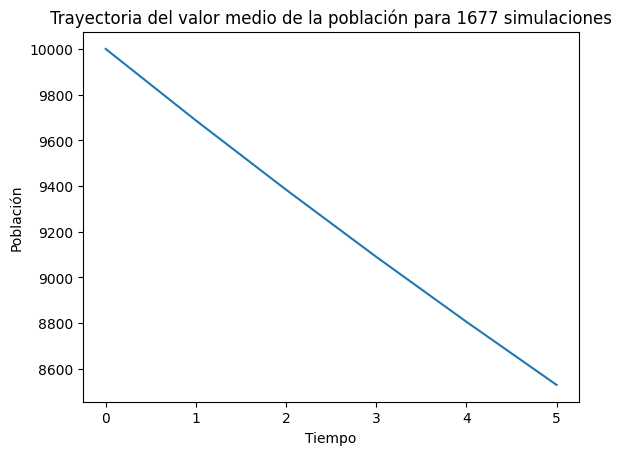

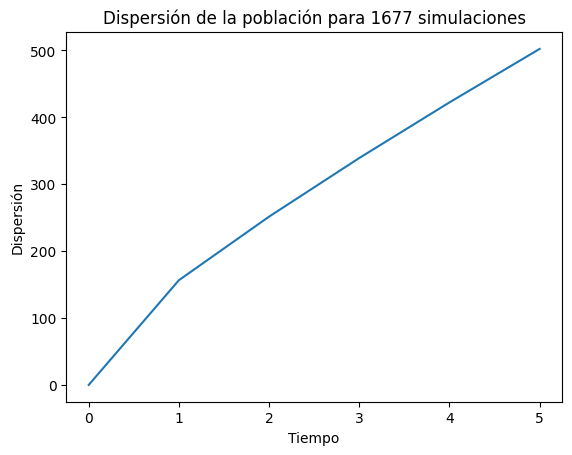

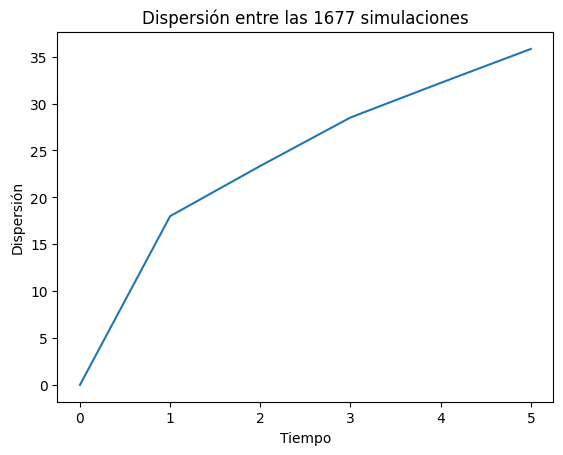

In [38]:
# Obtenemos la media para cada momento:
medias_ej2 = []
[medias_ej2.append(np.mean([sublista[i] for sublista in res_ej2])) for i in range(0, T_ej2 + 1)]

# Graficamos la trayectoria del valor medio de la población
plt.plot(medias_ej2)
plt.title(f'Trayectoria del valor medio de la población para {contador_simulaciones_ej2} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.show()

print("\n")

# Obtenemos la dispersion para cada momento
dispersiones_medias_ej2 = []
[dispersiones_medias_ej2.append(np.mean([sublista[i] for sublista in dispersiones_simuladas_ej2])) for i in range(0, T_ej2 + 1)]

# Graficamos
plt.plot(dispersiones_medias_ej2)
plt.title(f'Dispersión de la población para {contador_simulaciones_ej2} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.show()

print("\n")


# Obtenemos la dispersión entre cada simulación para cada momento
dispersiones_entre_simulaciones_ej2 = []
[dispersiones_entre_simulaciones_ej2.append(np.std([sublista[i] for sublista in res_ej2])) for i in range(0, T_ej2 + 1)]

# Graficamos
plt.plot(dispersiones_entre_simulaciones_ej2)
plt.title(f'Dispersión entre las {contador_simulaciones_ej2} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.show()

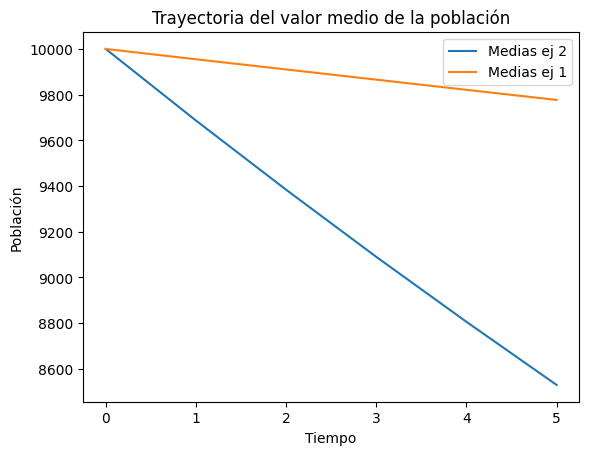

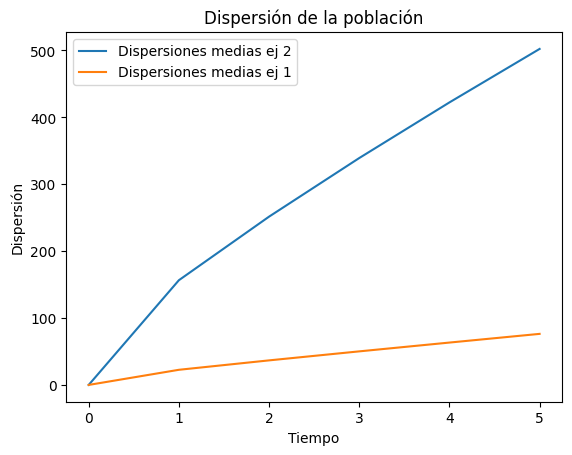

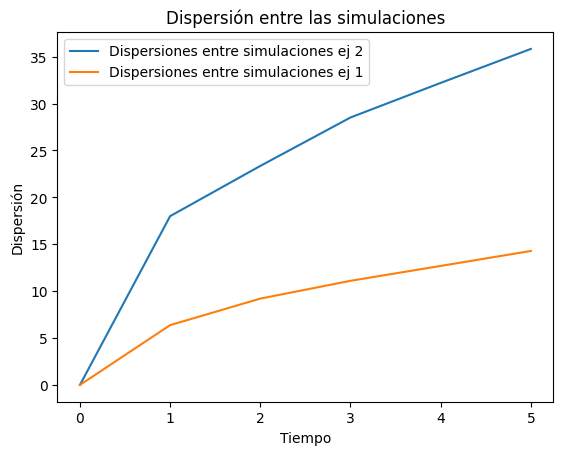

In [39]:
# Si comparamos los graficos respecto al ejercicio 1:
plt.plot(medias_ej2, label="Medias ej 2")
plt.plot(medias_ej1, label="Medias ej 1")
plt.title(f'Trayectoria del valor medio de la población')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.legend()
plt.show()

print("\n")

# Obtenemos la dispersion para cada momento
dispersiones_medias_ej2 = []
[dispersiones_medias_ej2.append(np.mean([sublista[i] for sublista in dispersiones_simuladas_ej2])) for i in range(0, T_ej2 + 1)]

# Graficamos
plt.plot(dispersiones_medias_ej2, label="Dispersiones medias ej 2")
plt.plot(dispersiones_medias_ej1, label="Dispersiones medias ej 1")
plt.title(f'Dispersión de la población')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.legend()
plt.show()

print("\n")


# Obtenemos la dispersión entre cada simulación para cada momento
dispersiones_entre_simulaciones_ej2 = []
[dispersiones_entre_simulaciones_ej2.append(np.std([sublista[i] for sublista in res_ej2])) for i in range(0, T_ej2 + 1)]

# Graficamos
plt.plot(dispersiones_entre_simulaciones_ej2, label="Dispersiones entre simulaciones ej 2")
plt.plot(dispersiones_entre_simulaciones_ej1, label="Dispersiones entre simulaciones ej 1")
plt.title(f'Dispersión entre las simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Dispersión')
plt.legend()
plt.show()

In [40]:
# Comparemos los resultados numéricamente de los 2 ejercicios simulados:
print(f'La diferencia de población entre los ejs para cada período es: {list(np.abs(np.array(poblacion_en_t_años_ej2) - np.array(poblacion_en_t_años_ej1)))}')
print(f'La diferencia de dispersión entre los ejs para cada período es: {list(np.abs(np.array(dispersiones_ej2) - np.array(dispersiones_ej1)))}')

# Observamos que la población en el ejercicio 2 disminuye más rapido debido a que existe el evento
# de la migración, además del de fallecimiento. Por esta misma razón la dispersión es mayor.

La diferencia de población entre los ejs para cada período es: [0, 258, 503, 775, 1006, 1221]
La diferencia de dispersión entre los ejs para cada período es: [0.0, 129.0, 205.3714316749092, 287.3660665524195, 357.7193096708283, 420.73780044966696]


# Ejercicio 3
Se presenta a continuación el siguiente Modelo Epidemiológico:

a) Enfermedad:

*   Una persona sana puede enfermarse con una tasa de infección 𝜄.



b) Fallecimiento:

* Una persona sana puede fallecer con una tasa de mortalidad 𝜇.

* Una persona enferma puede fallecer con una tasa de mortalidad 𝜈, donde 𝜇 < 𝜈.

c) Recuperación:

* Una persona enferma puede recuperarse (salir del grupo de infectados) y pasar a
formar parte del grupo de recuperados, con una tasa de recuperación 𝜌.

Grupos:

* I: Infectados

* S: Sanos o Susceptibles

* F: Fallecidos

* R: Recuperados

Condiciones:
a) Los recuperados no pueden volver a enfermarse.

b) Los recuperados pueden fallecer con una tasa de mortalidad 𝜔, donde 𝜇 < 𝜔 < 𝜈.

c) Los sanos pueden fallecer.

d) No es posible que a una misma persona le ocurran dos eventos en el mismo momento
’t’

Los siguientes son los parámetros utilizados en el modelo epidemiológico:

* 𝜄 = 0.1

* 𝜇 = 0.02

* 𝜈 = 0.05

* 𝜔 = 0.03

* 𝜌 = 0.1

Donde cada uno de ellos se distribuye según una distribución exponencial (∼ 𝑒𝑥𝑝(𝛽)).
Cada uno de los valores anteriores corresponden al parámetro 𝛽 de dicha distribución.

Condiciones Iniciales:

* Población total al inicio: 𝑁 = 10000

* Proporción de personas sanas al inicio: 𝑠0 = 0.9

* Proporción de personas infectadas al inicio: 𝑖0 = 0.1

* Proporción de personas fallecidas al inicio: 𝑓0 = 0.0

* Proporción de personas recuperadas al inicio: 𝑟0 = 0.0

Se pide:

1. Tamaño promedio de cada grupo (S, I, F, R) luego de 20 períodos y su dispersión.

2. Para cada grupo de la población (S, I, F, R), grafique 5 trayectorias de la simulación.
(Hint: tiene que haber 4 gráficos, con 5 trayectorias cada uno).

3. Calcular cuántos períodos deben transcurrir en promedio para que la cantidad de
sujetos que pertenecen al grupo S sea igual a 0.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros
y = 0.1 # Tasa de infección sobre sanos
u = 0.02 # Tasa de fallecimiento sobre sanos
v = 0.05 # Tasa de fallecimiento sobre enfermos
w = 0.03 # Tasa de fallecimiento sobre recuperados
p = 0.1 # Tasa de recuperación sobre enfermos

N = 10000
s0 = 0.9*N
i0 = 0.1*N
f0 = 0
r0 = 0

T = 20

In [2]:
def simular_poblacion_afectada_en_1_periodo(N, B, rng = np.random.default_rng(171123)):
    # Esta función calcula la población afectada por cierto evento.

    return rng.exponential(B)*N

In [3]:
# N ya no lo usamos, debido a que no se correspone a ninguna población en este momento.
# Usamos las otras 4 poblaciones.

# Como una persona no puede tener dos eventos al mismo tiempo, siempre se debe trabajar sobre la
# la población que cada grupo tenía el período anterior. Si usasemos el período actual, podrían
# ocurrir cosas como la siguiente:
# En T=0 hay 9000 sanos, 1000 enfermos, y 0 fallecidos y recuperados
# Imaginemos que 700 de los sanos pasan a enfermo, y 300 a fallecidos.
# Por lo tanto, los enfermos quedan en 1700 y los fallecidos en 300.
# Una vez hecho esto, si nosotros calculamos por ejemplo la cantidad de recuperados que hay, sobre
# los enfermos, si usamos el dato del período actual, estaríamos diciendo que se pueden recuperar
# personas sobre 1700 enfermos, cuando esto no es así, ya que ahí hay 700 personas que no pueden
# tener otro evento en este período. Por lo tanto, solo podrían recuperarse los 1000 iniciales.
# Este razonamiento se puede seguir para todos los períodos.

# Para resolver este problema, vamos a guardar en un diccionario auxiliar, los valores de cada grupo
# del período anterior.
def simular_1_periodo(s0, i0, f0, r0, T, y, u, v, w, p, rng = np.random.default_rng(171123)):
    datos = {
        "sanos" : [s0],
        "enfermos" : [i0],
        "fallecidos" : [f0],
        "recuperados" : [r0]
    }

    # Simulamos los 20 períodos.
    for i in range(0, T):
        # Trabajamos primero con los sanos, que pueden infectarse o fallecer.

        # Calculamos la población que queda luego de enfermarse en cada período.
        enfermos_periodo = simular_poblacion_afectada_en_1_periodo(datos["sanos"][-1], y, rng)
        i0 += enfermos_periodo
        s0 -= enfermos_periodo

        # Calculamos la población que queda luego de fallecer en cada período (la población de sanos
        # ya disminuyó por los que se enfermaron, por lo tanto no pueden enfermarse y fallecer en el
        # mismo período. Por eso volvemos a utilizar s0)
        fallecidos_periodo = simular_poblacion_afectada_en_1_periodo(s0, u, rng)
        f0 += fallecidos_periodo
        s0 -= fallecidos_periodo

        # Ahora vamos con los enfermos, quienes pueden recuperarse o fallecer:

        # Calculamos la población que queda luego de recuperarse:
        recuperados_periodo = simular_poblacion_afectada_en_1_periodo(datos["enfermos"][-1], p, rng)
        r0 += recuperados_periodo
        i0 -= recuperados_periodo
        # Calculamos la población que queda luego de los fallecimientos:
        # Usamos i0 por lo mismo que explicamos arriba.
        fallecidos_periodo = simular_poblacion_afectada_en_1_periodo(i0, v, rng)
        f0 += fallecidos_periodo
        i0 -= fallecidos_periodo

        # Ahora veamos los recuperados, quienes solo pueden fallecer, no pueden volver a ser sanos.
        # Esto es así ya que se aclara que los sanos pueden enfermarse pero los recuperados no, por lo
        # tanto los recuperados no pertenecen al grupo de los sanos.
        fallecidos_periodo = simular_poblacion_afectada_en_1_periodo(datos["recuperados"][-1], w, rng)
        f0 += fallecidos_periodo
        r0 -= fallecidos_periodo

        # Los fallecidos no pueden pasar a ningún otro estado. Solo queda actualizar los datos:
        datos["sanos"].append(np.round(s0))
        datos["enfermos"].append(np.round(i0))
        datos["recuperados"].append(np.round(r0))
        datos["fallecidos"].append(np.round(f0))

    return datos


In [4]:
# Probamos una vez la función para ver si da resultados que tengan sentido.
datos = simular_1_periodo(s0, i0, f0, r0, T, y, u, v, w, p)
for key, value in datos.items():
    print(f'{key.capitalize()}: {value}')

# Podemos ver que la suma de todas las poblaciones en el periodo final dan la población inicial, lo
# cual es correcto.
# Además, la cantidad de sanos siempre disminuye, la de fallecidos siempre crece, y la de
# enfermos y recuperados crece y decrece. Este comportamiento es correcto.

# Por último también probamos si en T=1 tiene sentido lo que pasó:
# Al haber 10 recuperados, significa que de los 1000 enfermos, 10 se recuperaron. Por lo tanto
# quedan 990 enfermos. Sin embargo vemos que en T=1 hay 1700 enfermos. Esto significa que 1700-990
# que es 710, eran sanos que pasaron a estar enfermos.
# Por lo tanto, viendo que la población de sanos disminuyó de 9000 a 7977, y que de esos 1023,
# 710 se enfermaron, significa que 313 fallecieron. Por lo tanto, todo dió con sentido.

Sanos: [9000.0, 7977.0, 5531.0, 5022.0, 4938.0, 4502.0, 4177.0, 2916.0, 2760.0, 2373.0, 2168.0, 1934.0, 1832.0, 1020.0, 997.0, 944.0, 905.0, 728.0, 562.0, 465.0, 408.0]
Enfermos: [1000.0, 1700.0, 3810.0, 4147.0, 3683.0, 3207.0, 3207.0, 3777.0, 3571.0, 3113.0, 2754.0, 2445.0, 2217.0, 2670.0, 2447.0, 2230.0, 2206.0, 1974.0, 1723.0, 1612.0, 1103.0]
Fallecidos: [0, 313.0, 640.0, 808.0, 937.0, 1398.0, 1692.0, 1935.0, 2077.0, 2592.0, 2827.0, 3424.0, 3728.0, 4222.0, 4429.0, 4627.0, 4713.0, 4945.0, 5005.0, 5132.0, 5300.0]
Recuperados: [0, 10.0, 19.0, 22.0, 441.0, 893.0, 924.0, 1372.0, 1592.0, 1922.0, 2251.0, 2196.0, 2223.0, 2087.0, 2126.0, 2200.0, 2175.0, 2354.0, 2710.0, 2791.0, 3189.0]


In [5]:
# Bueno, ahora llega el momento de simular para tratar de obtener los resultados con mayor precisión.

# Como mínimo, vamos a simular 30 veces.
num_simulaciones_minimas = 30
d = 1.96
desvio_actual = 0

cant_simulaciones_realizadas = 1 # lo iniciamos en 1 debido a la simulación corrida en el paso anterior.
res_ej3 = {
    "sanos" : [datos["sanos"]],
    "enfermos" : [datos["enfermos"]],
    "fallecidos" : [datos["fallecidos"]],
    "recuperados" : [datos["recuperados"]]
}
while (cant_simulaciones_realizadas < num_simulaciones_minimas or (cant_simulaciones_realizadas >= num_simulaciones_minimas and desvio_actual > d)):
    # Definimos una semilla que va aumentando según la cantidad de iteraciones. Esto lo hacemos
    # para que los vectores sean distintos entre sí, pero que cada vez que ejecutemos el código,
    # se van a generar estos mismos vectores.
    rng = np.random.default_rng(191123+cant_simulaciones_realizadas)

    datos = simular_1_periodo(s0, i0, f0, r0, T, y, u, v, w, p, rng)
    for key, value in res_ej3.items():
        value.append(datos[key])

    # Para calcular el desvío actual vamos a tomar el promedio de los 4 desvíos que tenemos.
    desvio_sanos = np.std(res_ej3["sanos"])
    desvio_enfermos = np.std(res_ej3["enfermos"])
    desvio_fallecidos= np.std(res_ej3["fallecidos"])
    desvio_recuperados = np.std(res_ej3["recuperados"])
    desvio_prom = np.mean([desvio_sanos, desvio_enfermos, desvio_fallecidos, desvio_recuperados])

    cant_simulaciones_realizadas += 1
    desvio_actual = desvio_prom / cant_simulaciones_realizadas

print(f'Se simuló {cant_simulaciones_realizadas} veces')

Se simuló 818 veces


In [6]:
# Obtenemos el valor esperado de cada grupo después de las simulaciones.:

for key, value in res_ej3.items():
    poblacion_en_t20 = [sublista[-1] for sublista in value]
    media_en_t20 = np.round(np.mean(poblacion_en_t20))
    print(f'El valor esperado de {key} en T=20 al realizar simulaciones es {media_en_t20}')

El valor esperado de sanos en T=20 al realizar simulaciones es 721.0
El valor esperado de enfermos en T=20 al realizar simulaciones es 1258.0
El valor esperado de fallecidos en T=20 al realizar simulaciones es 4712.0
El valor esperado de recuperados en T=20 al realizar simulaciones es 3308.0


In [7]:
def calcular_dispersion(poblacion):
    dispersiones = []
    for i in range(0, len(poblacion)):
        dispersiones.append(np.std(poblacion[:i+1]))
    return dispersiones

In [8]:
# En cuanto a la dispersión, vamos a analizar dos casos:
# 1. Como varía cada grupo en T=20 en promedio entre todas las simulaciones.

dispersiones_simuladas_por_grupo = []

for key, value in res_ej3.items():
    dispersiones_simuladas = []
    for simulacion in value:
        dispersiones_simuladas.append(calcular_dispersion(simulacion))

    dispersiones_en_20 = [sublista[-1] for sublista in dispersiones_simuladas]
    media_dispersion_en_20 = np.mean(dispersiones_en_20)

    print(f'La media de dispersiones en T=20 del grupo "{key}" en las simulaciones realizadas es {np.round(media_dispersion_en_20)}')

    # 2. Como varía la dispersión entre cada simulación en T=20.
    print(f'La dispersión entre simulaciones en T=20 es {np.std([sublista[-1] for sublista in value])}')

    # Guardamos el valor para graficar después:
    dispersiones_simuladas_por_grupo.append(dispersiones_simuladas)

La media de dispersiones en T=20 del grupo "sanos" en las simulaciones realizadas es 2504.0
La dispersión entre simulaciones en T=20 es 399.9274347142307
La media de dispersiones en T=20 del grupo "enfermos" en las simulaciones realizadas es 836.0
La dispersión entre simulaciones en T=20 es 448.2246715488804
La media de dispersiones en T=20 del grupo "fallecidos" en las simulaciones realizadas es 1470.0
La dispersión entre simulaciones en T=20 es 551.3379364601316
La media de dispersiones en T=20 del grupo "recuperados" en las simulaciones realizadas es 1170.0
La dispersión entre simulaciones en T=20 es 670.4580136436246


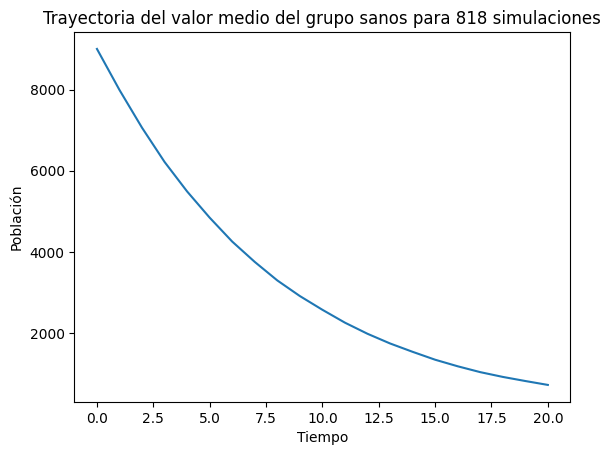

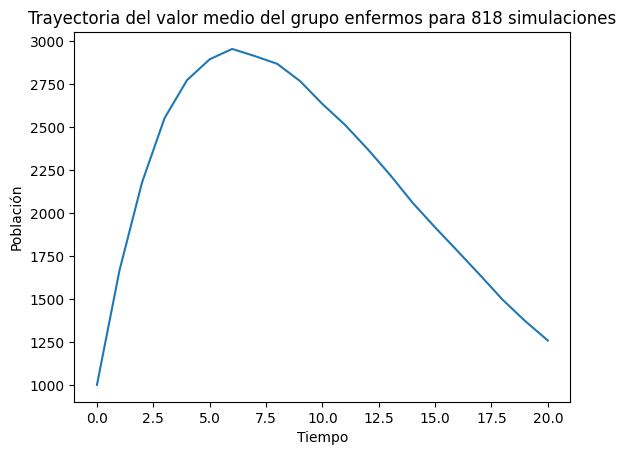

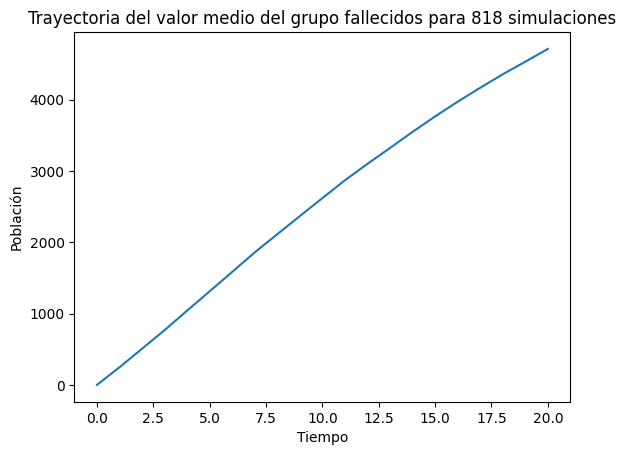

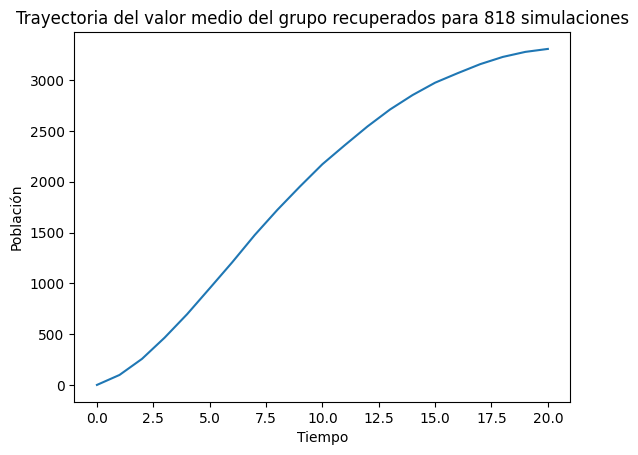

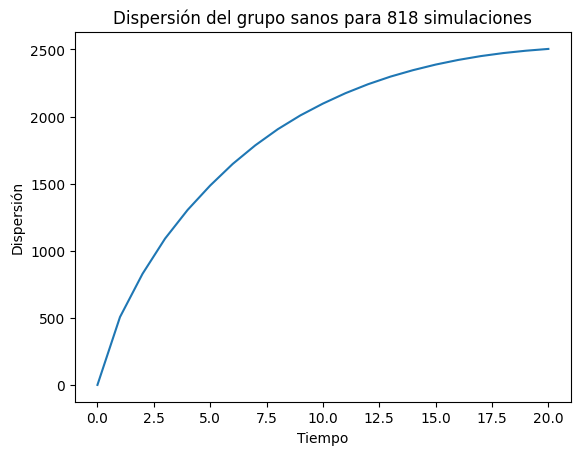

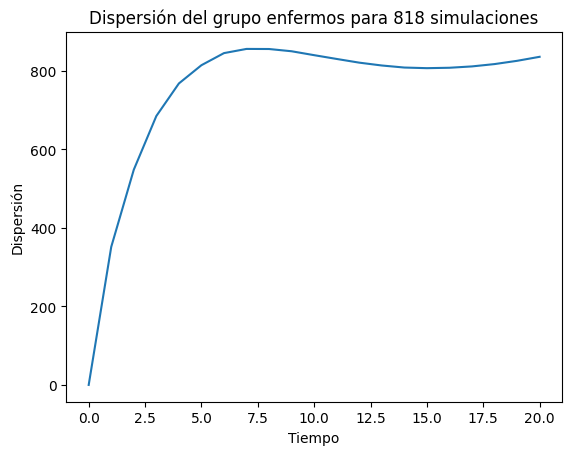

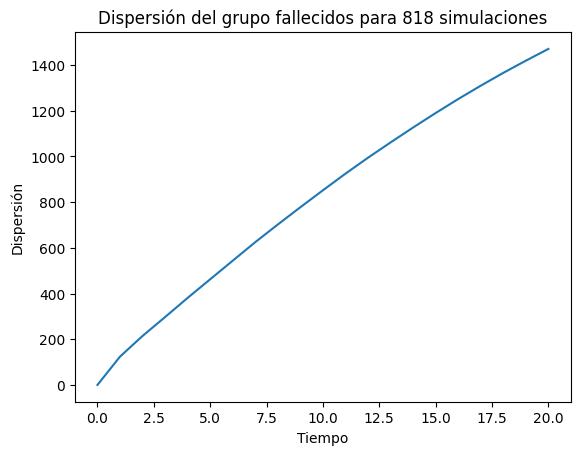

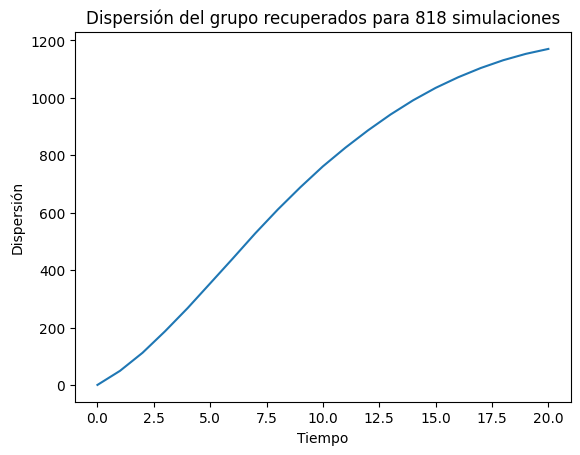

In [9]:
# Obtenemos la media para cada momento de cada grupo y lo graficamos:
for key, value in res_ej3.items():
    medias = []
    [medias.append(np.mean([sublista[i] for sublista in value])) for i in range(0, T + 1)]

    plt.plot(medias)
    plt.title(f'Trayectoria del valor medio del grupo {key} para {cant_simulaciones_realizadas} simulaciones')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.show()

    print("\n")

# Obtenemos la dispersion para cada momento de cada grupo:
keys = list(res_ej3.keys())
for key, value in res_ej3.items():
    dispersiones_medias = []
    [dispersiones_medias.append(np.mean([sublista[i] for sublista in dispersiones_simuladas_por_grupo[keys.index(key)]])) for i in range(0, T + 1)]

    plt.plot(dispersiones_medias)
    plt.title(f'Dispersión del grupo {key} para {cant_simulaciones_realizadas} simulaciones')
    plt.xlabel('Tiempo')
    plt.ylabel('Dispersión')
    plt.show()

    print("\n")

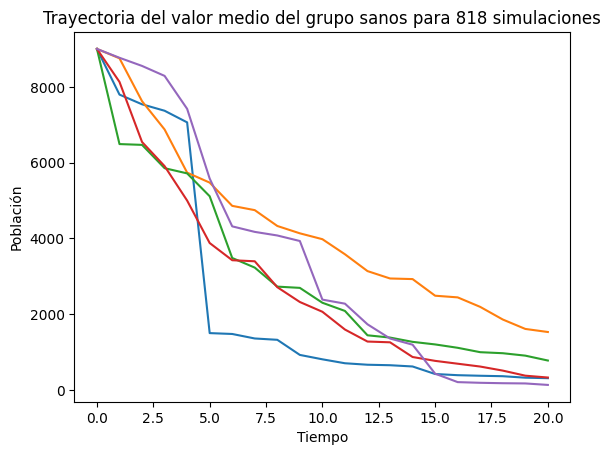

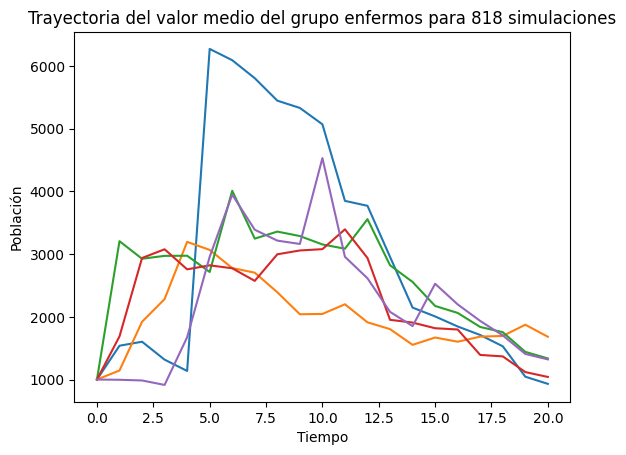

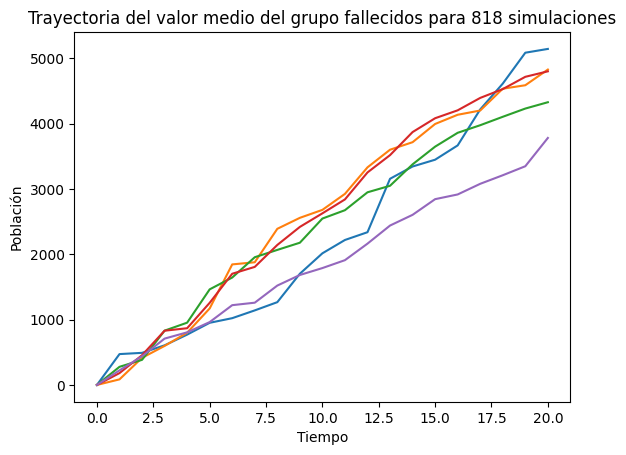

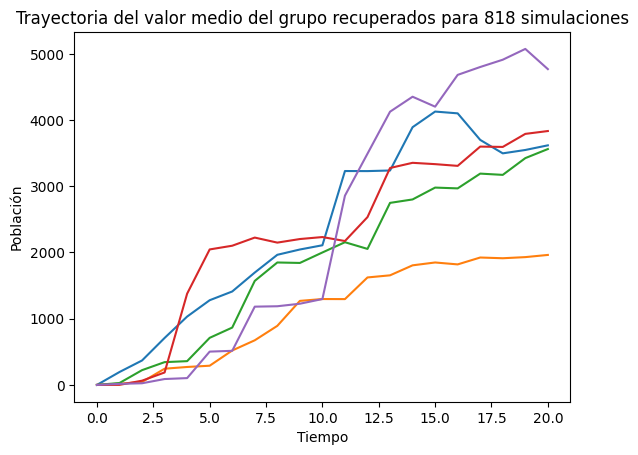

In [10]:
# Ahora vamos a graficar 5 trayectorias de la simulación para cada grupo. Vamos a elegir las
# trayectorias al azar (usando una semilla)

rng = np.random.default_rng(171123)
numeros_aleatorios = np.round(rng.uniform(low=0, high=cant_simulaciones_realizadas, size=5)).astype(int)

for key, value in res_ej3.items():
    # Generamos una sublista con 5 simulaciones aleatorias:
    vectores_seleccionados = [value[i] for i in numeros_aleatorios]

    plt.plot([[sublista[i] for sublista in vectores_seleccionados] for i in range(0, T + 1)])
    plt.title(f'Trayectoria del valor medio del grupo {key} para {cant_simulaciones_realizadas} simulaciones')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.show()

    print("\n")

In [11]:
def extincion_de_sanos(s0, y, u, rng):
    periodos = 0
    datos_sanos = [s0]

    while (s0 > 0):
        # A los que se enfermen los sacamos de sanos, teniendo en cuenta la población en T-1
        s0 -= simular_poblacion_afectada_en_1_periodo(datos_sanos[-1], y, rng)

        # A los que fallecen también los sacamos del grupo sanos. Acá solo pueden fallecer aquellos
        # que no se enfermaron (ya que en el mismo período solo puede ocurrir un solo evento).
        # Por lo tanto usamos el nuevo s0 como población.
        s0 -= simular_poblacion_afectada_en_1_periodo(s0, u, rng)

        s0 = np.round(s0)
        periodos += 1
        datos_sanos.append(s0)

    return periodos, datos_sanos

# Ahora simulamos varias veces esto. En este ejercicio es distinto, vamos a utilizar otro criterio,
# donde determinamos a mano la cantidad de simulaciones.
num_simulaciones_minimas = 1000

cant_simulaciones_realizadas_3 = 0
cant_periodos_total = []
listas_para_mostrar_graficamente = []
while (cant_simulaciones_realizadas_3 < num_simulaciones_minimas):
    # Definimos una semilla que va aumentando según la cantidad de iteraciones. Esto lo hacemos
    # para que los vectores sean distintos entre sí, pero que cada vez que ejecutemos el código,
    # se van a generar estos mismos vectores.
    rng = np.random.default_rng(191123+cant_simulaciones_realizadas_3)

    resultado = extincion_de_sanos(s0, y, u, rng)
    cant_periodos_total.append(resultado[0])
    listas_para_mostrar_graficamente.append(resultado[1])
    cant_simulaciones_realizadas_3 += 1

print(f'Se simuló {cant_simulaciones_realizadas_3} veces')

Se simuló 1000 veces


Se necesitan en promedio 208.0 períodos para que la población sana se haga 0


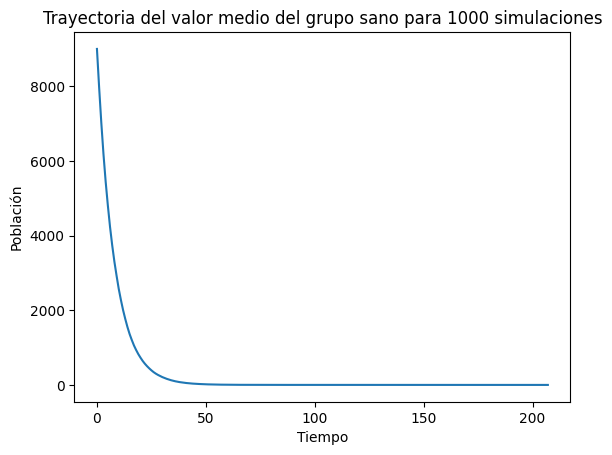

In [12]:
# Después de simular 1000 veces, obtenemos el promedio de cant_simulaciones_total
print(f'Se necesitan en promedio {np.round(np.mean(cant_periodos_total))} períodos para que la población sana se haga 0')

sublista_mas_larga = max(listas_para_mostrar_graficamente, key=len)
longitud_maxima = len(sublista_mas_larga)

medias_cada_momento = []
for sublista in listas_para_mostrar_graficamente:
    sublista.extend([0] * (longitud_maxima - len(sublista)))

[medias_cada_momento.append(np.mean([sublista[i] for sublista in listas_para_mostrar_graficamente])) for i in range(0, np.mean(cant_periodos_total).astype(int))]

plt.plot(medias_cada_momento)
plt.title(f'Trayectoria del valor medio del grupo sano para {cant_simulaciones_realizadas_3} simulaciones')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.show()

# En el gráfico podemos ver que al principio baja muy rápido la población, pero luego es cada vez mas lento.